In [61]:
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
import warnings

warnings.filterwarnings('ignore')

#Importing Dataset Diabetes
from google.colab import drive
drive.mount('/content/drive')

#Connecting Drive
file_path = '/content/drive/My Drive/Datasets/diabetes.csv'
diabetes = pd.read_csv(file_path)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:

#Generating training and verification sets

random = np.random.seed(45)
df_train, df_test = train_test_split(diabetes, train_size = 0.8, test_size = 0.2, random_state = random)
m = len(df_train)
n = len(df_test)


diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Accuracy: 0.7272727272727273
Recall: 0.66
Precision: 0.5689655172413793


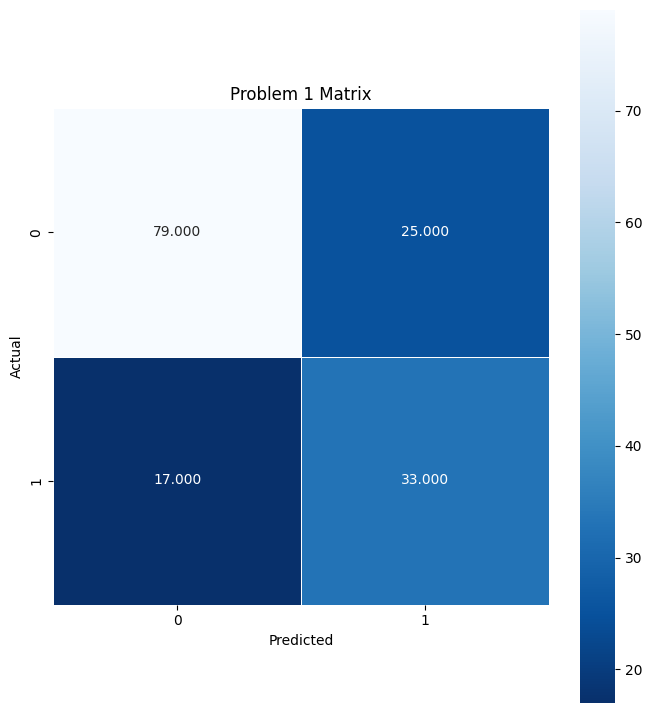

In [63]:
#Training for Problem 1

logisticRegr = LogisticRegression()
scaler = MinMaxScaler()

varlist = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

diabetes_train = df_train[varlist]
diabetes_test = df_test[varlist]

#Normalization

diabetes_train[varlist] = scaler.fit_transform(diabetes_train[varlist])
diabetes_test[varlist] = scaler.fit_transform(diabetes_test[varlist])

y_Train = diabetes_train.pop('Outcome')
x_Train = diabetes_train

y_Test = diabetes_test.pop('Outcome')
x_Test = diabetes_test

#Running logistic regression

logisticRegr.fit(x_Train, y_Train)

predict = logisticRegr.predict(diabetes_test)

confusionMatrix = metrics.confusion_matrix(y_Test, predict)

#Plotting confusion matrix

plt.figure(figsize=(8,9))
sns.heatmap(confusionMatrix, annot=True, fmt=".3f", linewidths=.6, square = True, cmap = 'Blues_r');
plt.ylabel('Actual');
plt.xlabel('Predicted');
plt.title('Problem 1 Matrix')


#Accuracy, Precision, Recall

TP = 33
TN = 79
FP = 25
FN = 17

print("Accuracy: " + str((TP + TN) / (TP + TN + FP + FN)))
print("Recall: " + str(TP / (TP + FN)))
print("Precision: " + str(TP / (TP + FP)))

In [64]:
#Problem 2

file_path = '/content/drive/My Drive/Datasets/cancer.csv'
cancer_dataset = pd.read_csv(file_path)

#Mapping text to number
varlist =  ['diagnosis']
def binary_map(x):
    return x.map({'B': 0, 'M': 1})

cancer_dataset[varlist] = cancer_dataset[varlist].apply(binary_map)


cancer_X = cancer_dataset.loc[:, ~cancer_dataset.columns.isin(['id', 'diagnosis','Unnamed: 32'])]
cancer_Y = cancer_dataset['diagnosis'].values



np.random.seed(17)
cancerX_train, cancerX_test, cancerY_train, cancerY_test = train_test_split(cancer_X, cancer_Y, train_size = 0.8, test_size = 0.2, random_state = 0)



In [65]:

#Scalar normalization
scalerMM = MinMaxScaler()
scalerSS = StandardScaler()


#Min Max or Standard normalize
cancerX_train = scalerMM.fit_transform(cancerX_train)
cancerX_test = scalerMM.fit_transform(cancerX_test)
# df_train = scalerSS.fit_transform(df_train)
# df_test = scalerSS.fit_transform(df_test)

classifier = LogisticRegression(random_state = 0)
classifier.fit(cancerX_train, cancerY_train)

y_pred = classifier.predict(cancerX_test)

conf_matrix = confusion_matrix(cancerY_test, y_pred)

Model Accuracy:	 0.8070
Model Precision: 0.6812
Model Recall:	 1.0000
Model F1 Score:	 0.8103 



Text(0.5, 427.9555555555555, 'Predicted')

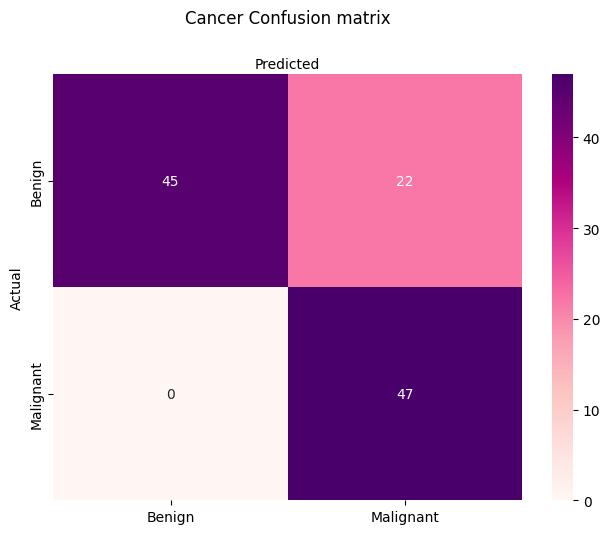

In [81]:
print("Model Accuracy:\t %5.4f" %metrics.accuracy_score(cancerY_test, y_pred))
print("Model Precision: %5.4f" %metrics.precision_score(cancerY_test, y_pred))
print("Model Recall:\t %5.4f" %metrics.recall_score(cancerY_test, y_pred))
print("Model F1 Score:\t %5.4f" %metrics.f1_score(cancerY_test, y_pred), "\n")

fig, ax = plt.subplots()
class_names = ["Benign", "Malignant"]
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap ="RdPu",fmt='g')

ax.xaxis.set_label_position("top")
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)
plt.tight_layout()
plt.title('Cancer Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [67]:
#pentalty against parameter

C = [10, 5, 1.5, .1, .001]
cancerX_train =  cancerX_train
cancerX_test = cancerX_test

for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(cancerX_train, cancerY_train)
    print('C:', c)
    print('Training accuracy:\t%5.4f' %clf.score(cancerX_train, cancerY_train))
    print('Test accuracy:\t\t%5.4f' %clf.score(cancerX_test, cancerY_test))
    print('')

C: 10
Training accuracy:	0.9890
Test accuracy:		0.8860

C: 5
Training accuracy:	0.9868
Test accuracy:		0.9035

C: 1.5
Training accuracy:	0.9758
Test accuracy:		0.9211

C: 0.1
Training accuracy:	0.9319
Test accuracy:		0.9211

C: 0.001
Training accuracy:	0.6374
Test accuracy:		0.5877



In [68]:
#Logistic Regression with penalty


clf = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')
clf.fit(cancerX_train, cancerY_train)

Y_pred = clf.predict(cancerX_test)

param_conf_matrix = confusion_matrix(cancerY_test, Y_pred)

Model Accuracy:	 0.8947
Model Precision: 0.8723
Model Recall:	 0.8723
Model F1 Score:	 0.8723 



Text(0.5, 427.9555555555555, 'Predicted')

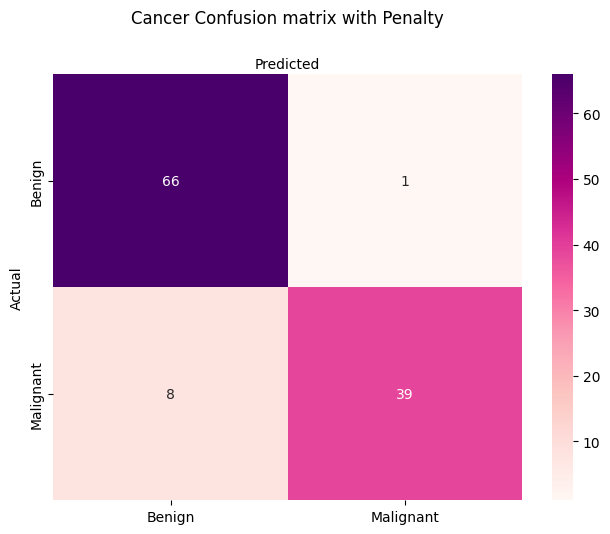

In [80]:
print("Model Accuracy:\t %5.4f" %metrics.accuracy_score(cancerY_test, Y_pred))
print("Model Precision: %5.4f" %metrics.precision_score(cancerY_test, Y_pred))
print("Model Recall:\t %5.4f" %metrics.recall_score(cancerY_test, Y_pred))
print("Model F1 Score:\t %5.4f" %metrics.f1_score(cancerY_test, Y_pred), "\n")

fig, ax = plt.subplots()
class_names = ["Benign", "Malignant"]
sns.heatmap(pd.DataFrame(param_conf_matrix), annot=True, cmap ="RdPu",fmt='g')

ax.xaxis.set_label_position("top")
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)
plt.tight_layout()
plt.title('Cancer Confusion matrix with Penalty', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [70]:
#Question 3

#classifier
classifier = GaussianNB()
classifier.fit(cancerX_train, cancerY_train)

y_pred = classifier.predict(cancerX_test)

conf_matrix = confusion_matrix(cancerY_test, y_pred)



              precision    recall  f1-score   support

           0       1.00      0.67      0.80        67
           1       0.68      1.00      0.81        47

    accuracy                           0.81       114
   macro avg       0.84      0.84      0.81       114
weighted avg       0.87      0.81      0.81       114

[[45 22]
 [ 0 47]]


Text(0.5, 427.9555555555555, 'Predicted')

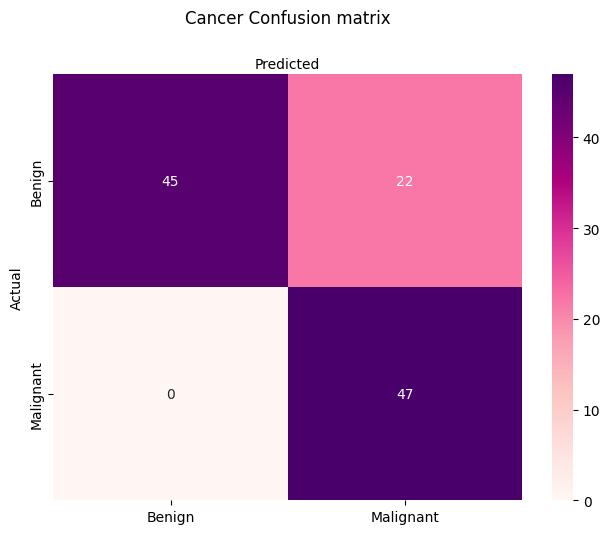

In [78]:
#Evaluation and Plotting

#printing using metrics and y_pred

print(metrics.classification_report(cancerY_test, y_pred))
print(metrics.confusion_matrix(cancerY_test, y_pred))

fig, ax = plt.subplots()
class_names = ["Benign", "Malignant"]
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap ="RdPu",fmt='g')

ax.xaxis.set_label_position("top")
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)
plt.tight_layout()
plt.title('Cancer Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [72]:
#Question 4
#15 compjents is a overall better score
n_components = 15
pca = PCA(n_components=n_components)
prinComp = pca.fit_transform(cancer_X)

#Data is split into trainng (80%) and validation sets (20%)
cancerX_train, cancerX_test, cancerY_train, cancerY_test = train_test_split(prinComp, cancer_Y, test_size = 0.20, random_state = 0)

columnNames = [f'principal component {i+1}' for i in range(n_Components)]
principalDf = pd.DataFrame(data=prinComp, columns=columnNames)
principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,principal component 13,principal component 14,principal component 15
0,1160.142574,-293.917544,48.578398,-8.711975,32.000486,1.265415,0.931337,0.148167,0.745463,0.589359,-0.307804,0.043452,0.034777,0.065069,-0.012934
1,1269.122443,15.630182,-35.394534,17.861283,-4.334874,-0.225872,-0.046037,0.200804,-0.485828,-0.084035,0.080642,0.033042,0.045485,-0.005534,0.021368
2,995.793889,39.156743,-1.709753,4.199340,-0.466529,-2.652811,-0.779745,-0.274026,-0.173874,-0.186994,0.279174,-0.020464,0.083505,0.024824,-0.026887
3,-407.180803,-67.380320,8.672848,-11.759867,7.115461,1.299436,-1.267304,-0.060555,-0.330639,-0.144155,0.927471,-0.174720,0.282556,0.080057,0.043201
4,930.341180,189.340742,1.374801,8.499183,7.613289,1.021160,-0.335522,0.289109,0.036087,-0.138502,0.042228,-0.062721,-0.114247,0.002274,-0.019548


In [73]:
classifier = LogisticRegression(random_state=0,penalty='l2',C=.5) #Uncomment this line for Part B.
classifier.fit(cancerX_train, cancerY_train)

Y_pred = classifier.predict(cancerX_test)

In [74]:
P = metrics.precision_score(cancerY_test, Y_pred)
R = metrics.recall_score(cancerY_test, Y_pred)
F1 = 2 * (P * R) / (P + R)
print(f"Accuracy: {100 * metrics.accuracy_score(cancerY_test, Y_pred):.2f}%")
print(f"Precision: {100 * P:.2f}%")
print(f"Recall: {100 * R:.2f}%")
print(f"F1 Score: {F1:.3f}")

Accuracy: 94.74%
Precision: 90.20%
Recall: 97.87%
F1 Score: 0.939


In [75]:
#Problem 5
#selecting 6 components for a better score
n_components = 6
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(cancer_X)

#Data is split into trainng (80%) and validation sets (20%)
cancerX_train, cancerX_test, cancerY_train, cancerY_test = train_test_split(prinComp, cancer_Y, test_size = 0.20, random_state = 0)

column_names = [f'principal component {i+1}' for i in range(n_components)]
principalDf = pd.DataFrame(data=principalComponents, columns=column_names)
principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6
0,1160.142574,-293.917544,48.578398,-8.711975,32.000486,1.265415
1,1269.122443,15.630182,-35.394534,17.861283,-4.334874,-0.225872
2,995.793889,39.156743,-1.709753,4.199340,-0.466529,-2.652811
3,-407.180803,-67.380320,8.672848,-11.759867,7.115461,1.299436
4,930.341180,189.340742,1.374801,8.499183,7.613289,1.021160


In [76]:
model = GaussianNB()
model.fit(cancerX_train, cancerY_train)

# make predictions
Y_pred = model.predict(cancerX_test)

#Next the scores for different validation metrics are displayed.

P = metrics.precision_score(cancerY_test, Y_pred)
R = metrics.recall_score(cancerY_test, Y_pred)
F1 = 2 * (P * R) / (P + R)
print(f"Accuracy: {100 * metrics.accuracy_score(cancerY_test, Y_pred):.2f}%")
print(f"Precision: {100 * P:.2f}%")
print(f"Recall: {100 * R:.2f}%")
print(f"F1 Score: {F1:.3f}")

Accuracy: 89.47%
Precision: 87.23%
Recall: 87.23%
F1 Score: 0.872
